# Lung Cancer Exploratory Data Analysis

**Date:** August 03, 2024

**By** Muhammad Hassan Saboor

Data Analyst | ML & Deep Learning Enthusiast

*Student of Masters in Data Science @ FAST NUCES (LAHORE)*


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
import warnings

# Basic Important Settings

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
warnings.filterwarnings("ignore")

# Importing Dataset

In [4]:
df = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')

## Checking top rows of dataset

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

# Data Cleaning

In [8]:
df["GENDER"].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [9]:
df["AGE"].value_counts()

AGE
64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64

In [10]:
df["SMOKING"].value_counts()

SMOKING
2    174
1    135
Name: count, dtype: int64

In [11]:
df["YELLOW_FINGERS"].value_counts()

YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64

In [12]:
df["ANXIETY"].value_counts()

ANXIETY
1    155
2    154
Name: count, dtype: int64

In [13]:
df["PEER_PRESSURE"].value_counts()

PEER_PRESSURE
2    155
1    154
Name: count, dtype: int64

In [14]:
df["CHRONIC DISEASE"].value_counts()

CHRONIC DISEASE
2    156
1    153
Name: count, dtype: int64

In [15]:
df["FATIGUE "].value_counts()

FATIGUE 
2    208
1    101
Name: count, dtype: int64

In [16]:
df["ALLERGY "].value_counts()

ALLERGY 
2    172
1    137
Name: count, dtype: int64

In [17]:
df["WHEEZING"].value_counts()

WHEEZING
2    172
1    137
Name: count, dtype: int64

In [18]:
df["SWALLOWING DIFFICULTY"].value_counts()

SWALLOWING DIFFICULTY
1    164
2    145
Name: count, dtype: int64

In [19]:
df["CHEST PAIN"].value_counts()

CHEST PAIN
2    172
1    137
Name: count, dtype: int64

In [20]:
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Converting Data into strings **for personal ease**

In [22]:
df['GENDER'] = df['GENDER'].replace({'M': "Male", 'F': "Female"})
df['SMOKING'] = df['SMOKING'].replace({2: "Yes", 1: "No"})
df['YELLOW_FINGERS'] = df['YELLOW_FINGERS'].replace({2: "Yes", 1: "No"})
df['ANXIETY'] = df['ANXIETY'].replace({2: "Yes", 1: "No"})
df['PEER_PRESSURE'] = df['PEER_PRESSURE'].replace({2: "Yes", 1: "No"})
df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].replace({2: "Yes", 1: "No"})
df['FATIGUE '] = df['FATIGUE '].replace({2: "Yes", 1: "No"})
df['ALLERGY '] = df['ALLERGY '].replace({2: "Yes", 1: "No"})
df['WHEEZING'] = df['WHEEZING'].replace({2: "Yes", 1: "No"})
df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].replace({2: "Yes", 1: "No"})
df['COUGHING'] = df['COUGHING'].replace({2: "Yes", 1: "No"})
df['SHORTNESS OF BREATH'] = df['SHORTNESS OF BREATH'].replace({2: "Yes", 1: "No"})
df['SWALLOWING DIFFICULTY'] = df['SWALLOWING DIFFICULTY'].replace({2: "Yes", 1: "No"})
df['CHEST PAIN'] = df['CHEST PAIN'].replace({2: "Yes", 1: "No"})
# df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO':0 })

In [23]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHRONIC DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS OF BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST PAIN             309 non-null    object
 15  LUNG_CANCER            

All males with Lung Cancer

# Exploratory Data Analysis

In [25]:
genders_with_lung_cancer = df.groupby(['GENDER', 'LUNG_CANCER']).size().reset_index(name='count')

In [26]:
genders_with_lung_cancer.T

,0,1,2,3
GENDER,Female,Female,Male,Male
LUNG_CANCER,NO,YES,NO,YES
count,22,125,17,145


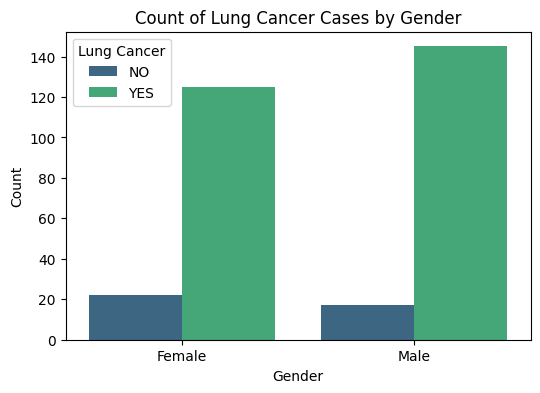

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x='GENDER', y='count', hue='LUNG_CANCER', data=genders_with_lung_cancer, palette='viridis')
plt.title('Count of Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer')
plt.show()

In [28]:
gender_with_smoking_have_lung_cancer =df.groupby(['GENDER', 'SMOKING' , 'LUNG_CANCER']).size().reset_index(name='count')

In [29]:
gender_with_smoking_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
SMOKING,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,12,55,10,70,8,60,9,85


<Figure size 600x400 with 0 Axes>

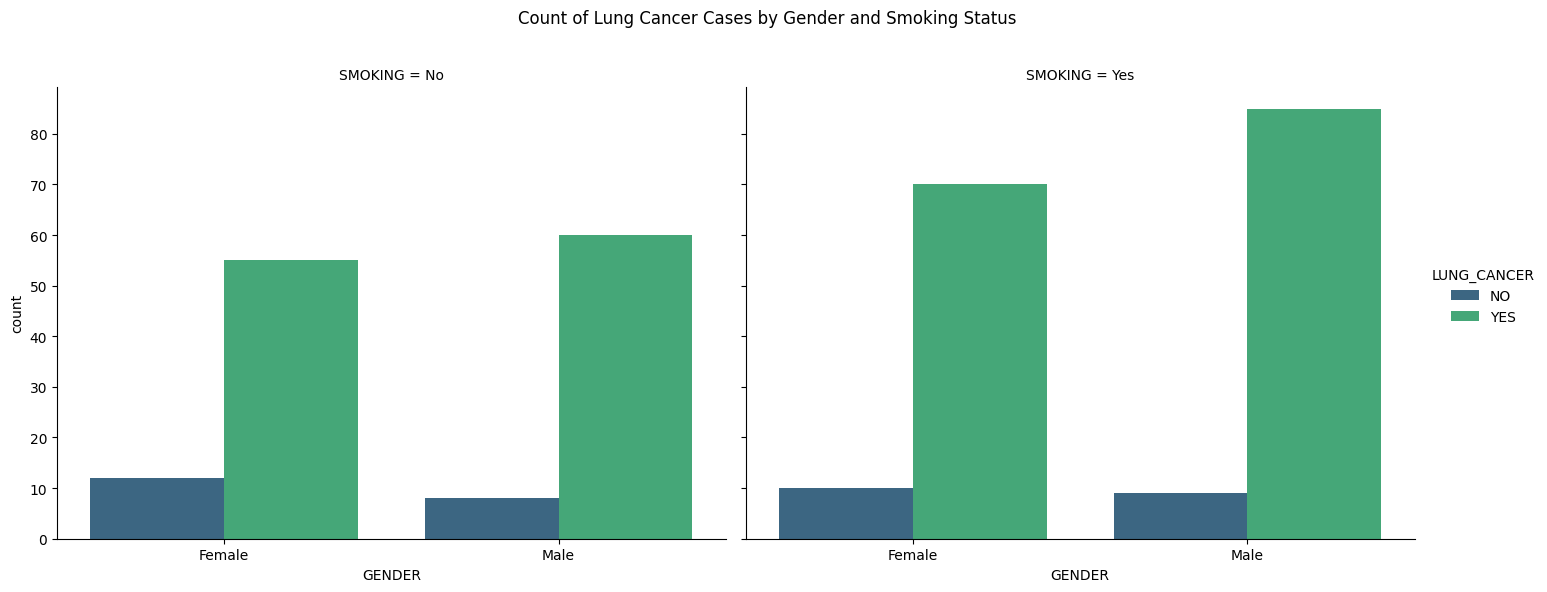

In [30]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='SMOKING', data=gender_with_smoking_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Smoking Status')
plt.show()

In [31]:
genders_with_yellow_fingers_have_lung_cancer = df.groupby(['GENDER', 'YELLOW_FINGERS' , 'LUNG_CANCER']).size().reset_index(name='count')

In [32]:
genders_with_yellow_fingers_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
YELLOW_FINGERS,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,15,32,7,93,11,75,6,70


<Figure size 600x400 with 0 Axes>

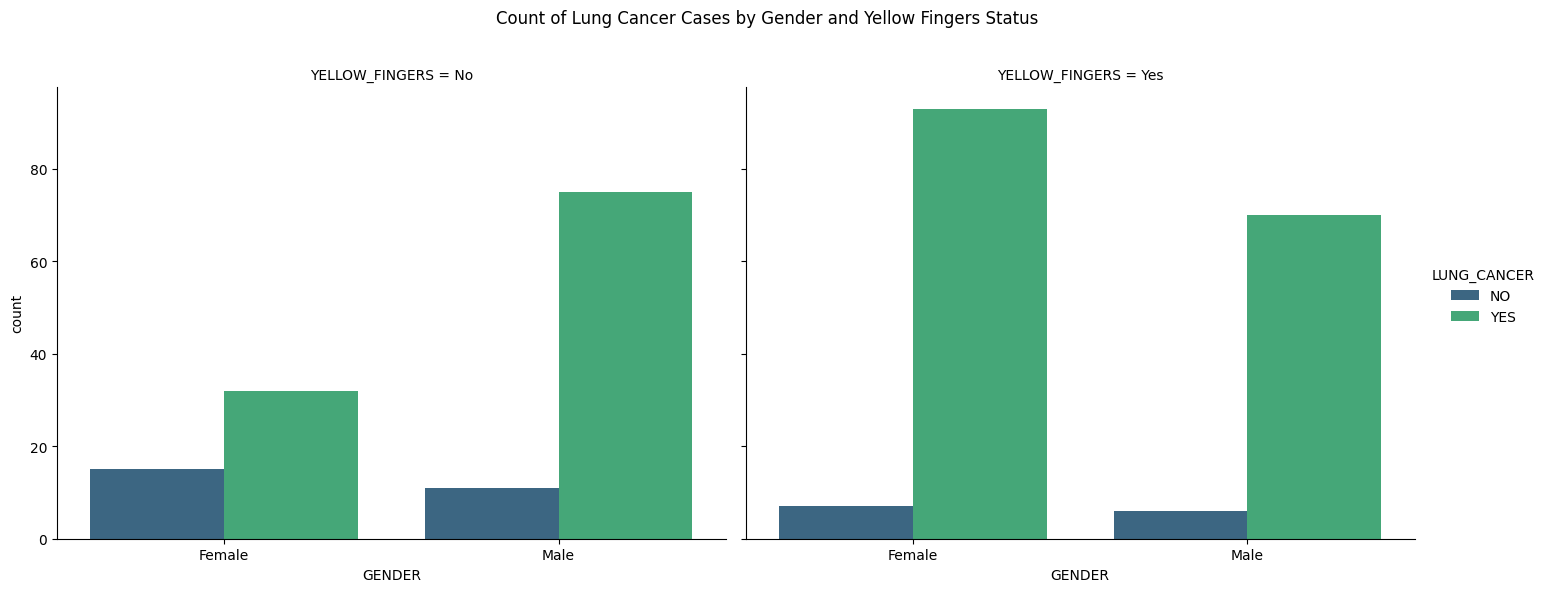

In [33]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='YELLOW_FINGERS', data=genders_with_yellow_fingers_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Yellow Fingers Status')
plt.show()

In [34]:
genders_with_anxiety_have_lung_cancer = df.groupby(['GENDER', 'ANXIETY' , 'LUNG_CANCER']).size().reset_index(name='count')

In [35]:
genders_with_anxiety_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
ANXIETY,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,18,44,4,81,9,84,8,61


<Figure size 600x400 with 0 Axes>

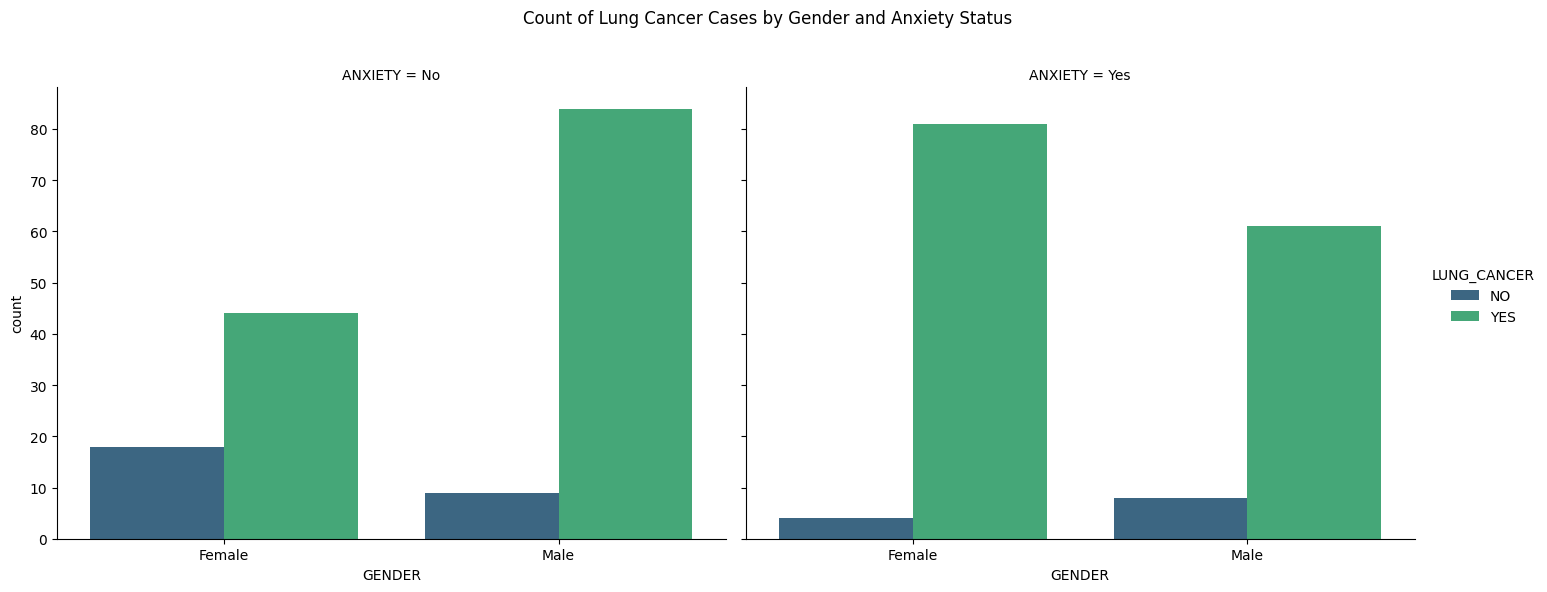

In [36]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='ANXIETY', data=genders_with_anxiety_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Anxiety Status')
plt.show()

In [37]:
genders_with_peer_pressure_have_lung_cancer = df.groupby(['GENDER', 'PEER_PRESSURE' , 'LUNG_CANCER']).size().reset_index(name='count')

In [38]:
genders_with_peer_pressure_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
PEER_PRESSURE,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,19,33,3,92,10,92,7,53


<Figure size 600x400 with 0 Axes>

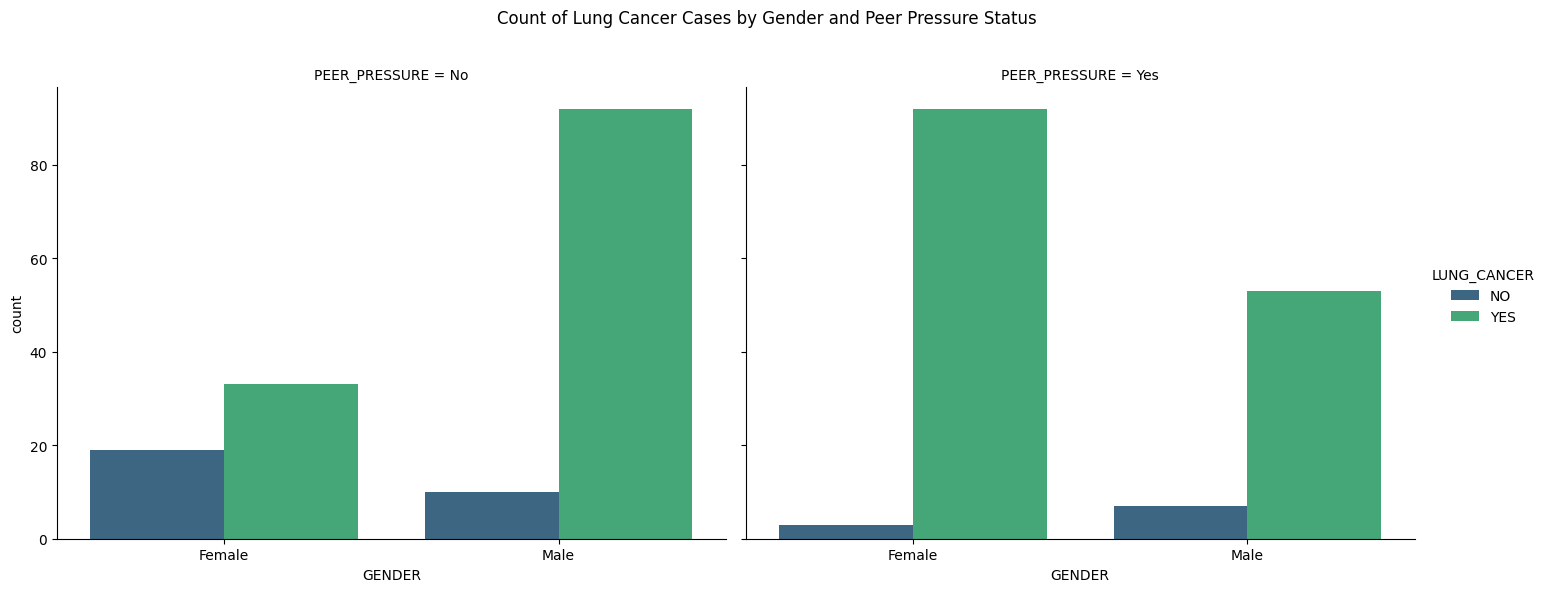

In [39]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='PEER_PRESSURE', data=genders_with_peer_pressure_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Peer Pressure Status')
plt.show()

In [40]:
genders_with_chronic_disease_have_lung_cancer = df.groupby(['GENDER', 'CHRONIC DISEASE' , 'LUNG_CANCER']).size().reset_index(name='count')

In [41]:
genders_with_chronic_disease_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
CHRONIC DISEASE,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,12,45,10,80,13,83,4,62


<Figure size 600x400 with 0 Axes>

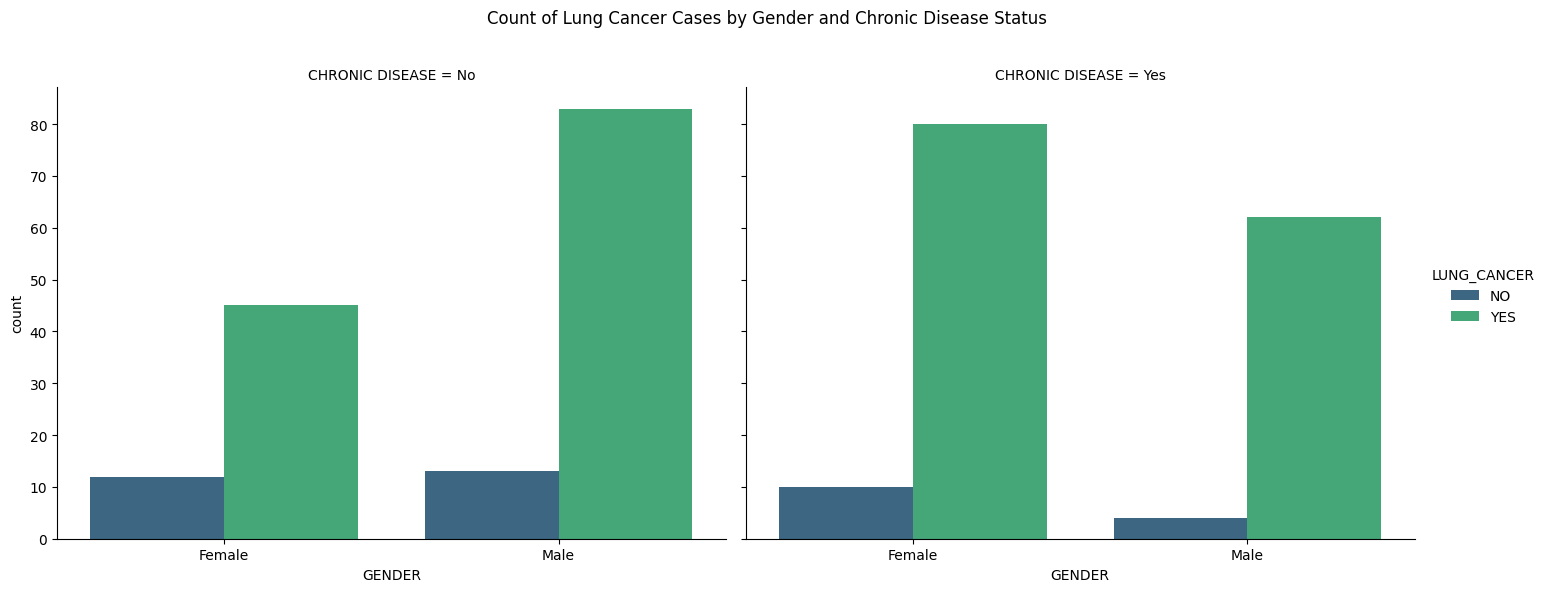

In [42]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='CHRONIC DISEASE', data=genders_with_chronic_disease_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Chronic Disease Status')
plt.show()

In [43]:
genders_with_fatigue_have_lung_cancer = df.groupby(['GENDER', 'FATIGUE ' , 'LUNG_CANCER']).size().reset_index(name='count')

In [44]:
genders_with_fatigue_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
FATIGUE,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,8,34,14,91,12,47,5,98


<Figure size 600x400 with 0 Axes>

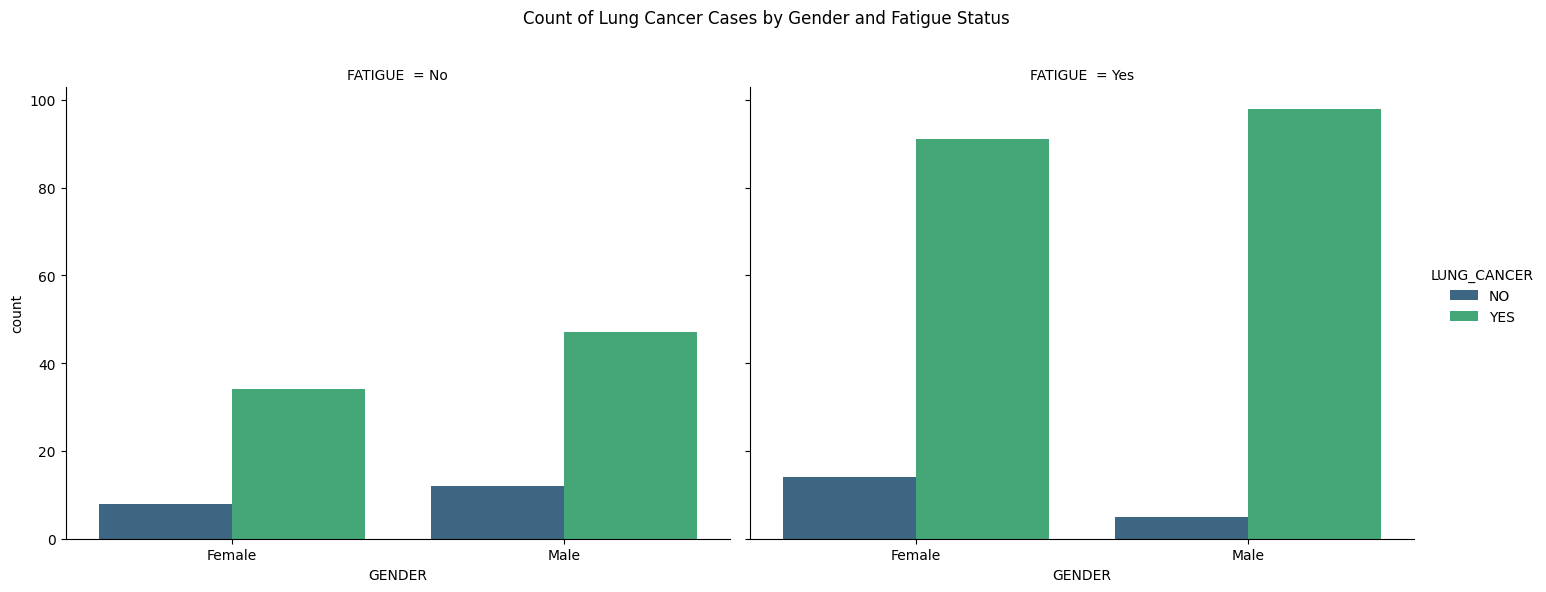

In [45]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='FATIGUE ', data=genders_with_fatigue_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Fatigue Status')
plt.show()

In [46]:
genders_with_allergy_have_lung_cancer = df.groupby(['GENDER', 'ALLERGY ' , 'LUNG_CANCER']).size().reset_index(name='count')

In [47]:
genders_with_allergy_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
ALLERGY,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,20,57,2,68,14,46,3,99


<Figure size 600x400 with 0 Axes>

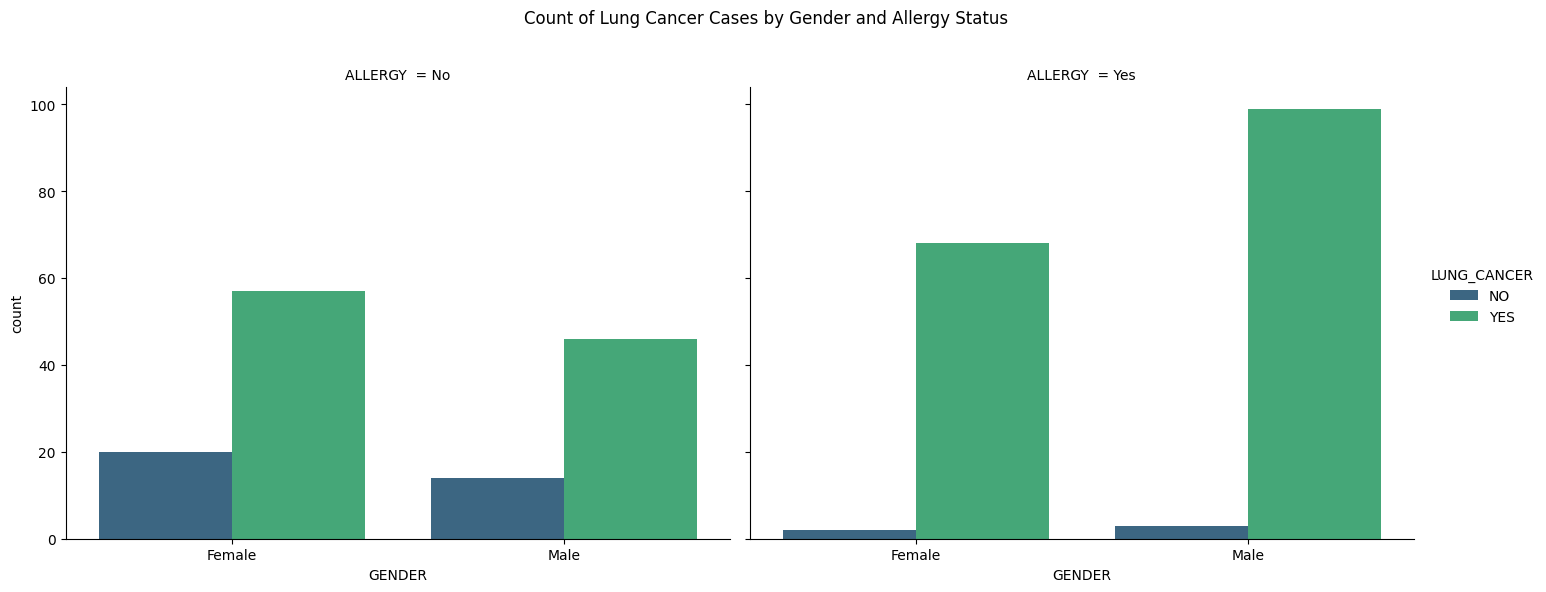

In [48]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='ALLERGY ', data=genders_with_allergy_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Allergy Status')
plt.show()

In [49]:
genders_with_wheezing_have_lung_cancer = df.groupby(['GENDER', 'WHEEZING' , 'LUNG_CANCER']).size().reset_index(name='count')

In [50]:
genders_with_wheezing_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
WHEEZING,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,18,58,4,67,12,49,5,96


<Figure size 600x400 with 0 Axes>

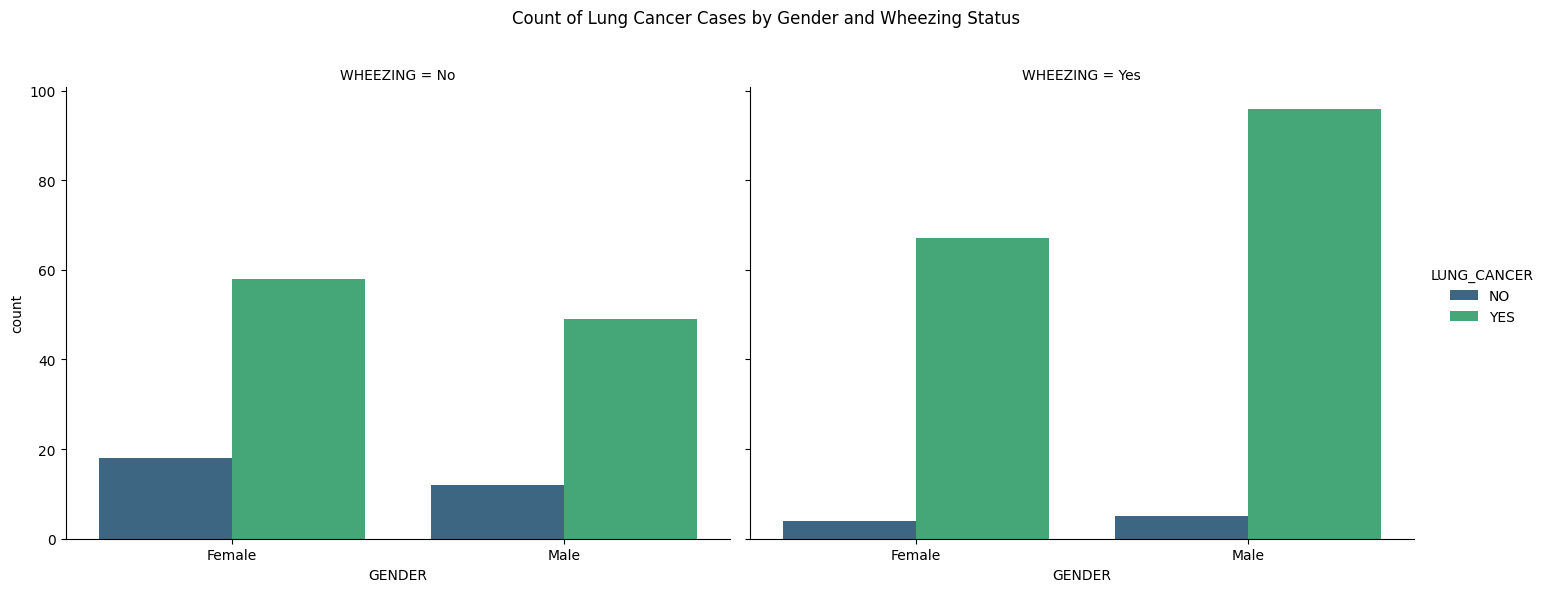

In [51]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='WHEEZING', data=genders_with_wheezing_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Wheezing Status')
plt.show()

In [52]:
genders_with_alcohol_consuming_have_lung_cancer = df.groupby(['GENDER', 'ALCOHOL CONSUMING' , 'LUNG_CANCER']).size().reset_index(name='count')

In [53]:
genders_with_alcohol_consuming_have_lung_cancer.T

,0,1,2,3,4,5,6
GENDER,Female,Female,Female,Male,Male,Male,Male
ALCOHOL CONSUMING,No,No,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,YES,NO,YES,NO,YES
count,22,78,47,10,27,7,118


<Figure size 600x400 with 0 Axes>

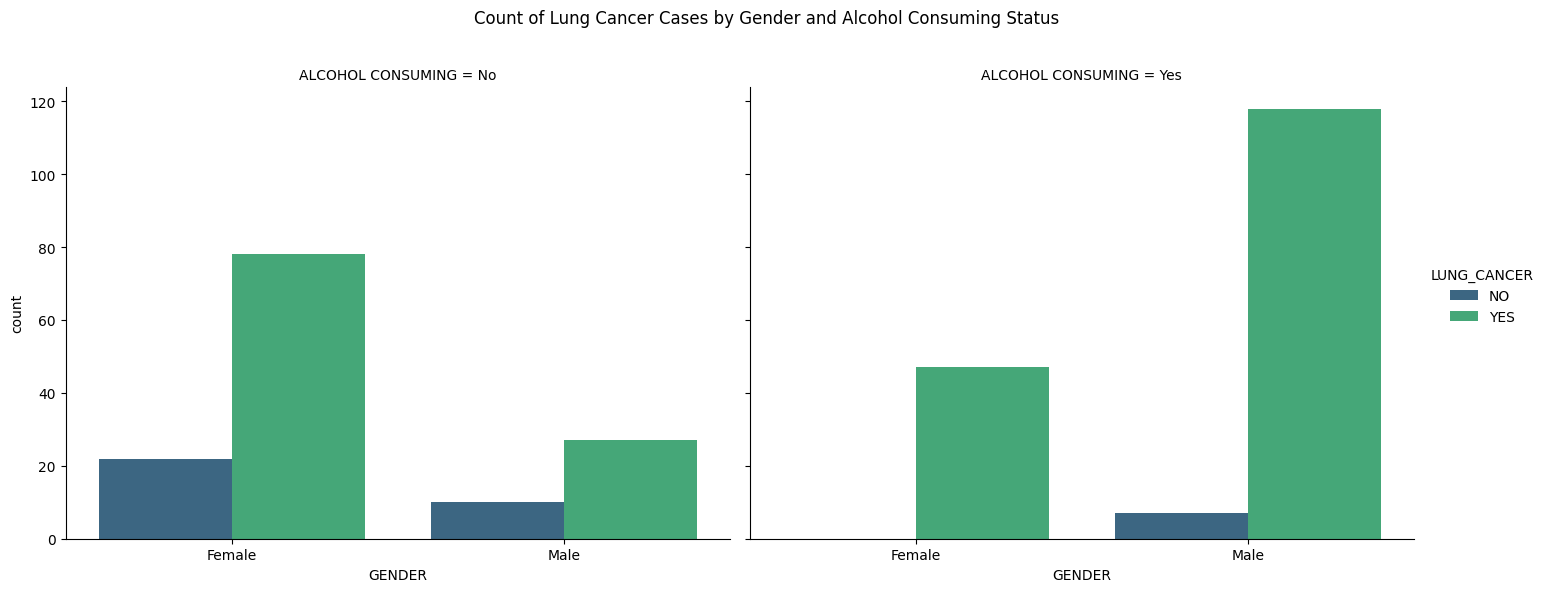

In [54]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='ALCOHOL CONSUMING', data=genders_with_alcohol_consuming_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Alcohol Consuming Status')
plt.show()

In [55]:
genders_with_coughing_have_lung_cancer = df.groupby(['GENDER', 'COUGHING' , 'LUNG_CANCER']).size().reset_index(name='count')

In [56]:
genders_with_coughing_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
COUGHING,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,17,55,5,70,12,46,5,99


<Figure size 600x400 with 0 Axes>

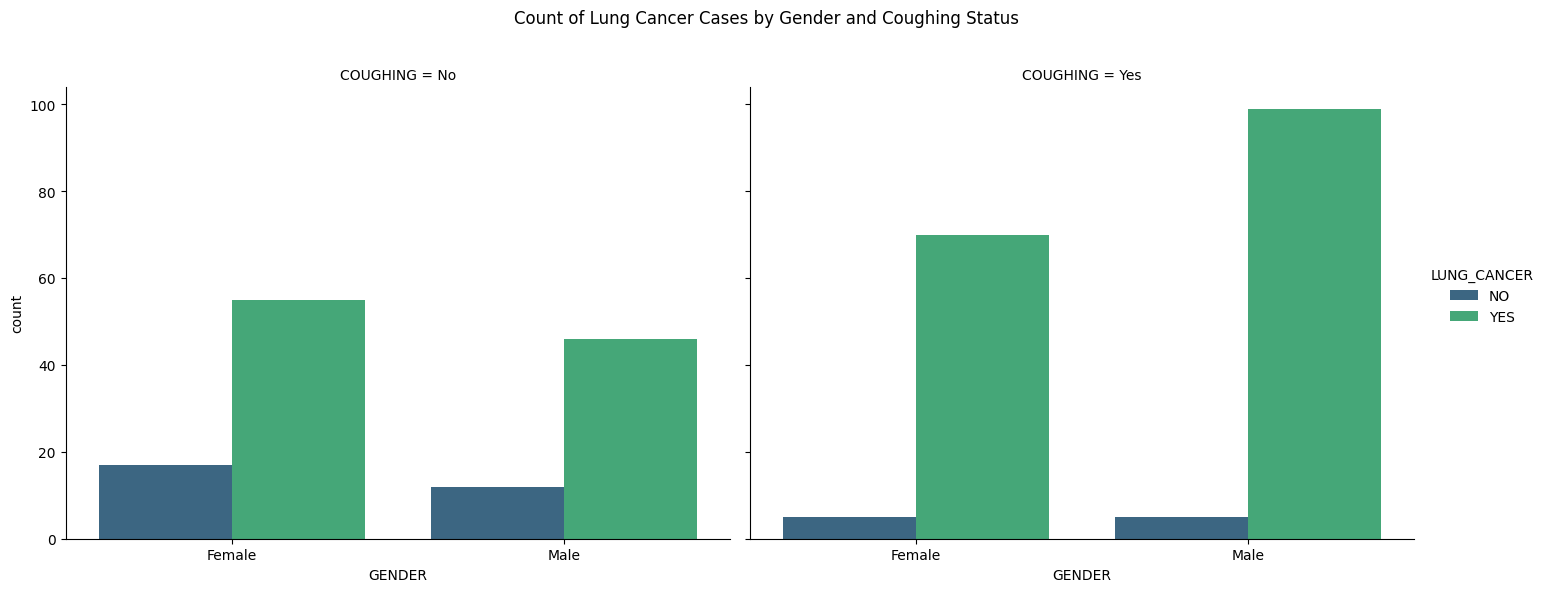

In [57]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='COUGHING', data=genders_with_coughing_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Coughing Status')
plt.show()

In [58]:
genders_with_shortness_of_breath_have_lung_cancer = df.groupby(['GENDER', 'SHORTNESS OF BREATH' , 'LUNG_CANCER']).size().reset_index(name='count')

In [59]:
genders_with_shortness_of_breath_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
SHORTNESS OF BREATH,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,6,42,16,83,11,52,6,93


<Figure size 600x400 with 0 Axes>

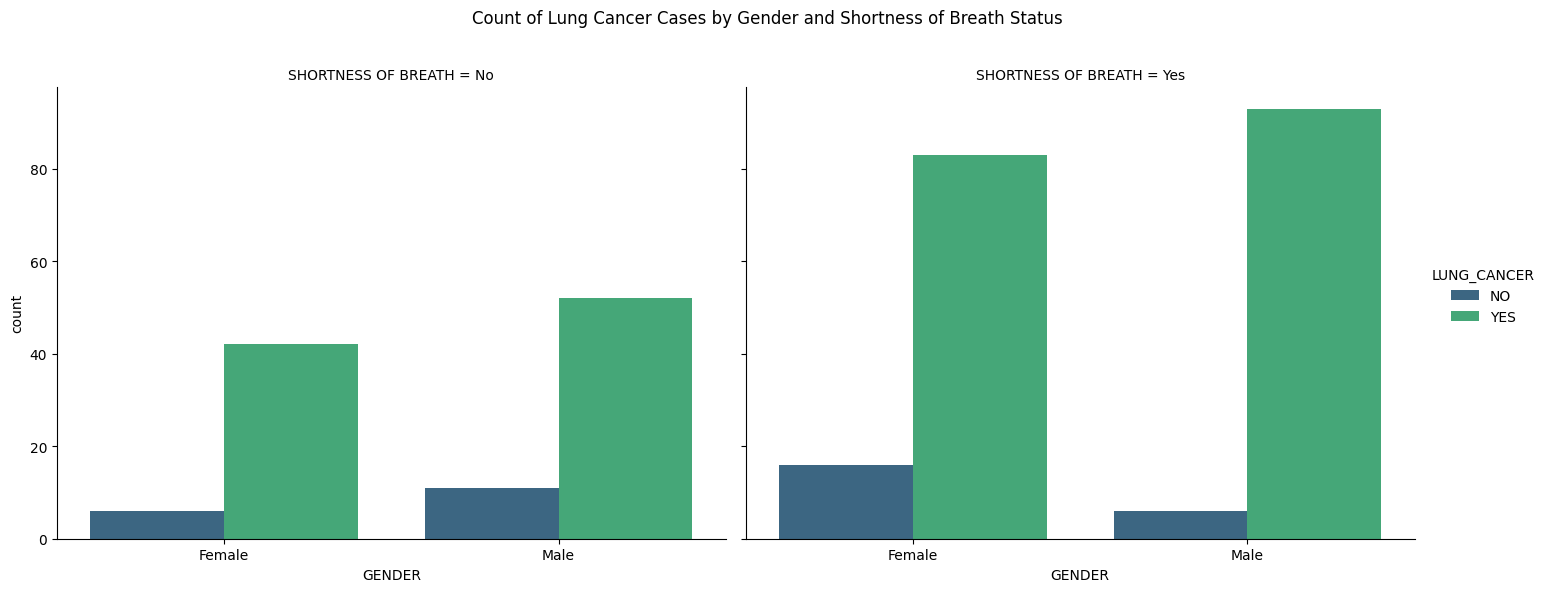

In [60]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='SHORTNESS OF BREATH', data=genders_with_shortness_of_breath_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Shortness of Breath Status')
plt.show()

In [61]:
genders_with_swallowing_difficulty_have_lung_cancer = df.groupby(['GENDER', 'SWALLOWING DIFFICULTY' , 'LUNG_CANCER']).size().reset_index(name='count')

In [62]:
genders_with_swallowing_difficulty_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
SWALLOWING DIFFICULTY,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,21,51,1,74,13,79,4,66


<Figure size 600x400 with 0 Axes>

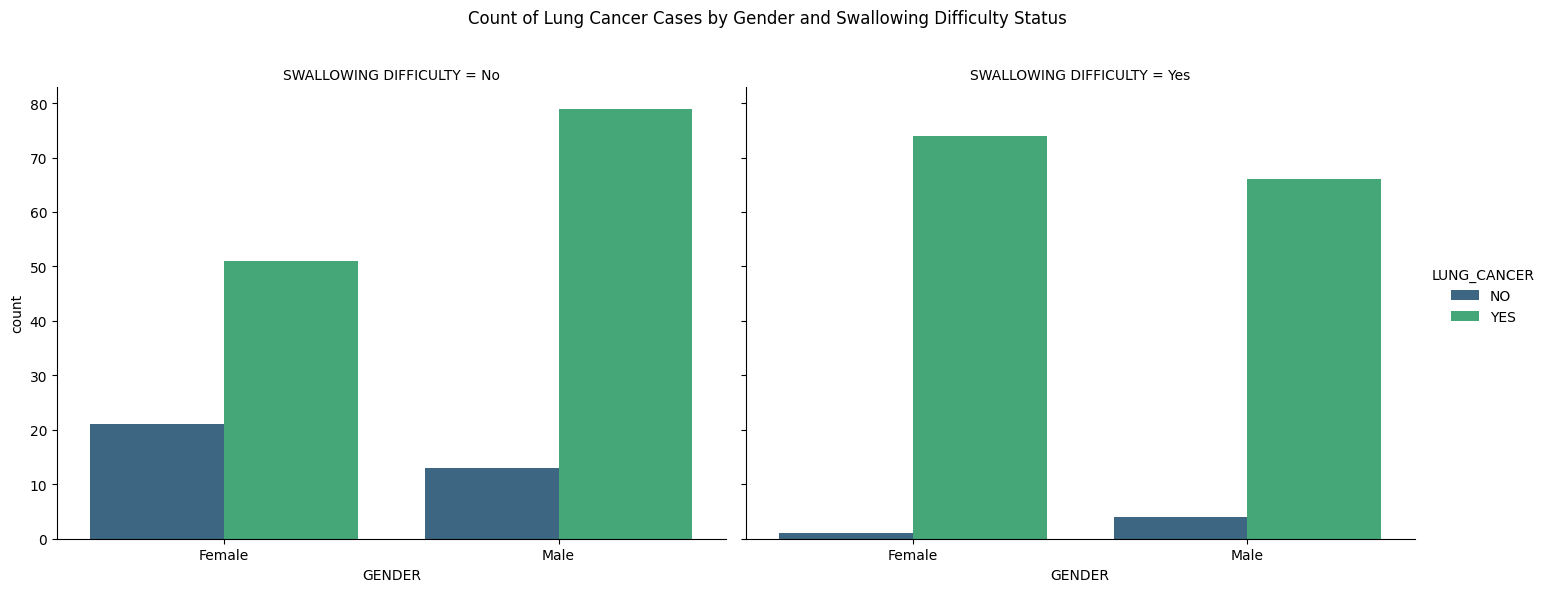

In [63]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='SWALLOWING DIFFICULTY', data=genders_with_swallowing_difficulty_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Swallowing Difficulty Status')
plt.show()

In [64]:
genders_with_chest_pain_have_lung_cancer = df.groupby(['GENDER', 'CHEST PAIN' , 'LUNG_CANCER']).size().reset_index(name='count')

In [65]:
genders_with_chest_pain_have_lung_cancer.T

,0,1,2,3,4,5,6,7
GENDER,Female,Female,Female,Female,Male,Male,Male,Male
CHEST PAIN,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES
count,20,73,2,52,7,37,10,108


<Figure size 600x400 with 0 Axes>

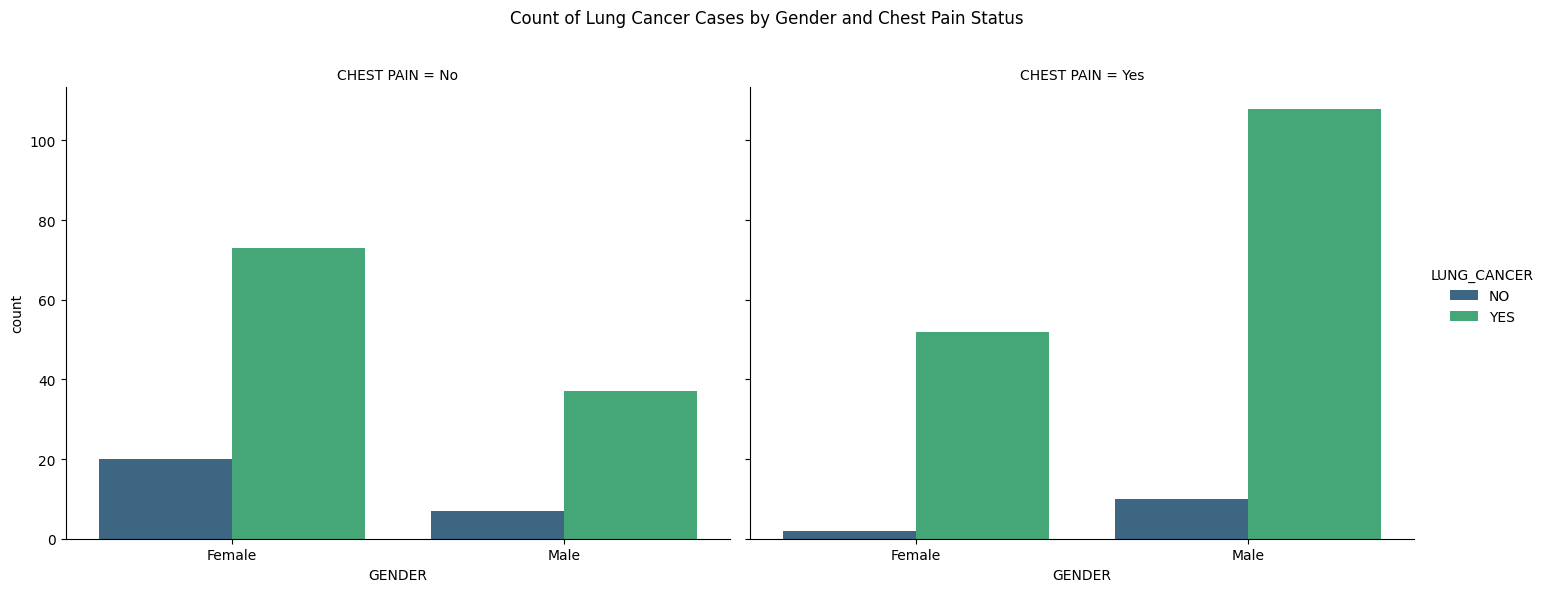

In [66]:
plt.figure(figsize=(6, 4))
sns.catplot(x='GENDER', y='count', hue='LUNG_CANCER', col='CHEST PAIN', data=genders_with_chest_pain_have_lung_cancer, kind='bar', palette='viridis', height=6, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Lung Cancer Cases by Gender and Chest Pain Status')
plt.show()

In [67]:
df['AGE_CATEGORY'] = pd.cut(df['AGE'],bins=[0,13,18,45,60,130],labels=['Children','Teens','Adults','Mid Adults','Elderly'])

In [68]:
age_category = df.groupby(['AGE_CATEGORY','LUNG_CANCER']).size().unstack(fill_value=0)

In [69]:
age_category.T

AGE_CATEGORY,Children,Teens,Adults,Mid Adults,Elderly
LUNG_CANCER,,,,,
NO,0,0,1,18,20
YES,0,0,4,100,166


In [70]:
genders_with_age_category = df.groupby(['GENDER', 'AGE_CATEGORY']).size().reset_index(name='count')

In [71]:
genders_with_age_category.T

,0,1,2,3,4,5,6,7,8,9
GENDER,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Teens,Adults,Mid Adults,Elderly,Children,Teens,Adults,Mid Adults,Elderly
count,0,0,3,58,86,0,0,2,60,100


<Figure size 1000x600 with 0 Axes>

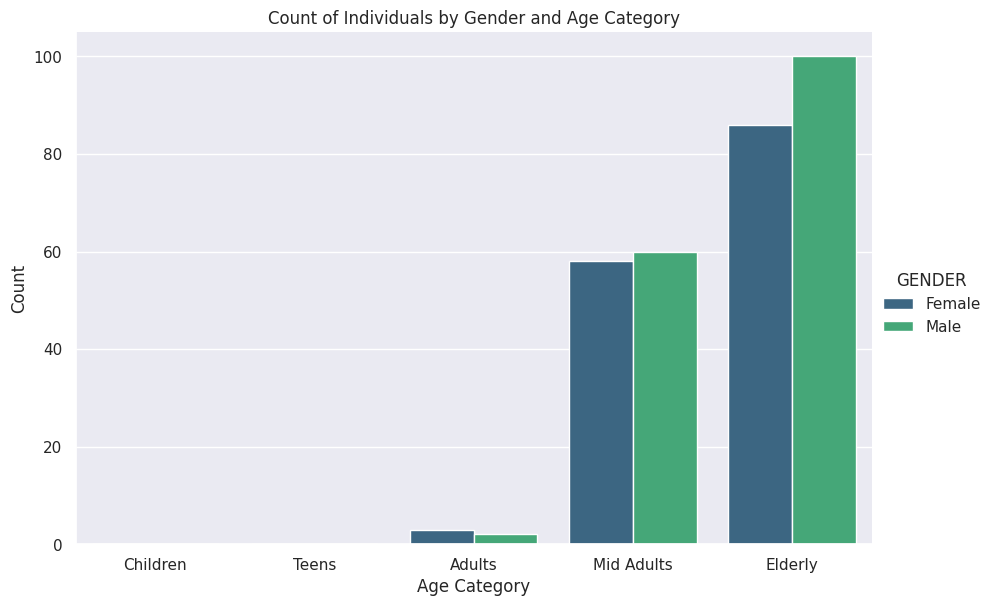

In [72]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.catplot(x='AGE_CATEGORY', y='count', hue='GENDER', data=genders_with_age_category, kind='bar', palette='viridis', height=6, aspect=1.5)
plt.title('Count of Individuals by Gender and Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [73]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_CATEGORY
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES,Elderly
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES,Elderly
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO,Mid Adults
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO,Elderly
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO,Elderly


In [74]:
genders_with_age_category_with_smoking_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'SMOKING', 'LUNG_CANCER']).size().reset_index(name='count')

In [75]:
genders_with_age_category_with_smoking_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
SMOKING,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,0,1,1,1,5,20,5,28,7,34,4,41,0,0,0,0,0,0,0,0,0,1,0,1,5,18,3,34,3,41,6,50


<Figure size 1400x1000 with 0 Axes>

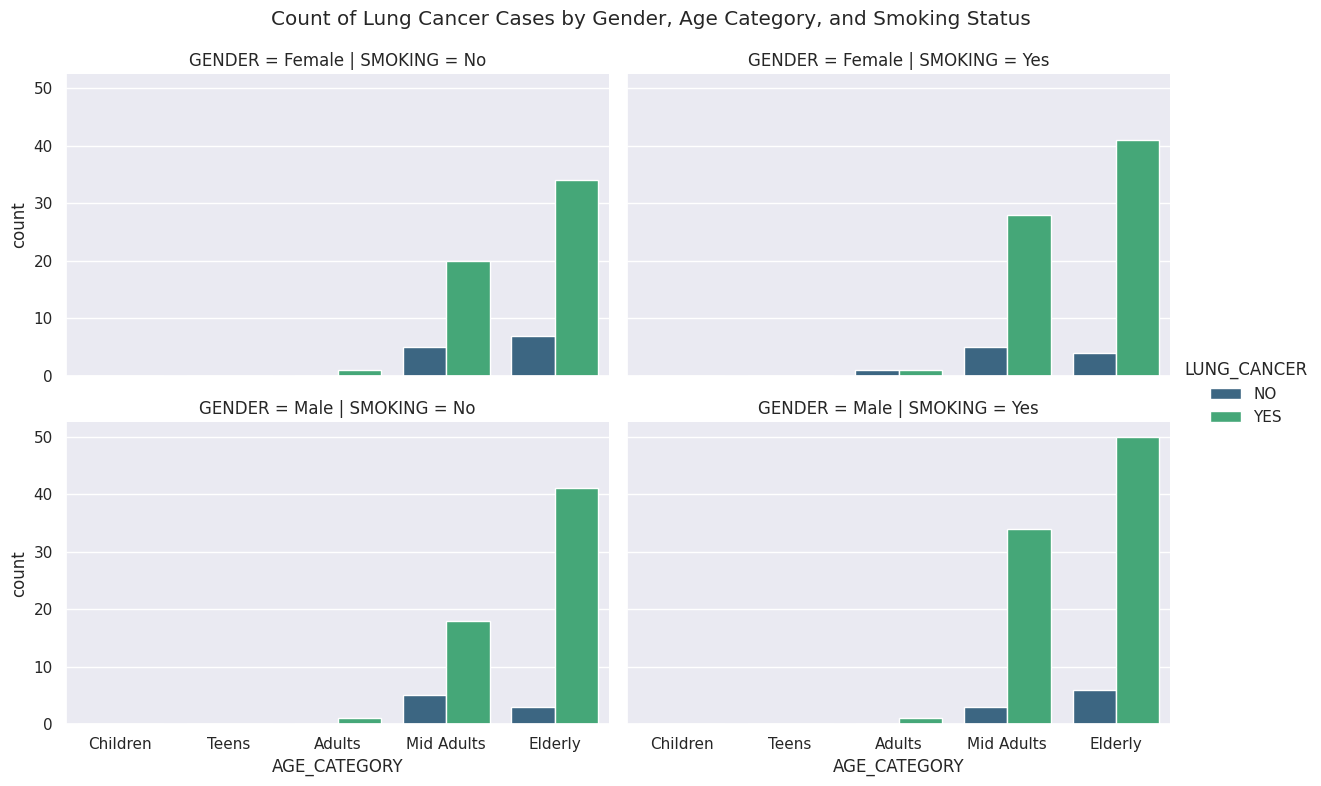

In [76]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='SMOKING', row='GENDER', data=genders_with_age_category_with_smoking_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Smoking Status')
plt.show()

In [77]:
genders_with_age_category_with_yellow_fingers_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'YELLOW_FINGERS', 'LUNG_CANCER']).size().reset_index(name='count')

In [78]:
genders_with_age_category_with_yellow_fingers_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
YELLOW_FINGERS,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,0,0,2,6,13,4,35,8,19,3,56,0,0,0,0,0,0,0,0,0,1,0,1,3,32,5,20,8,42,1,49


<Figure size 1400x1000 with 0 Axes>

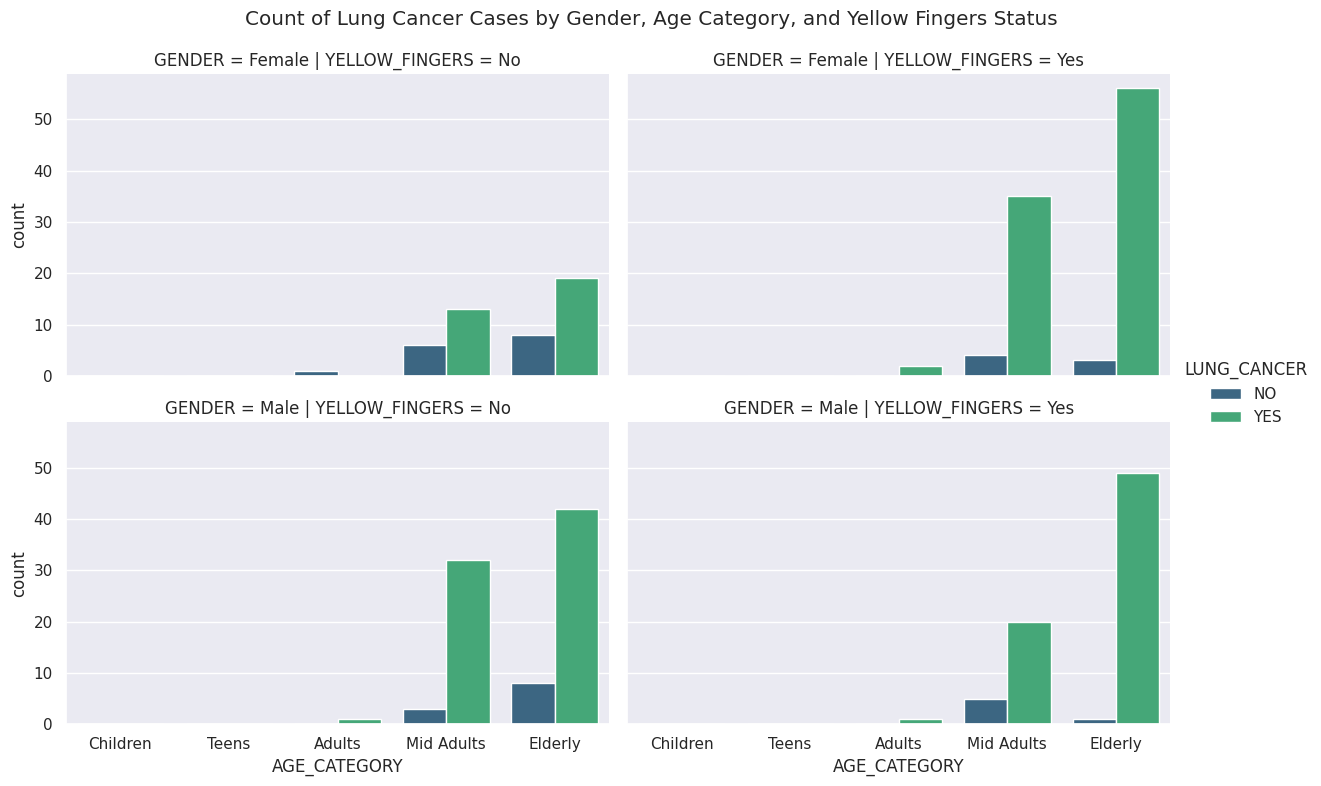

In [79]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='YELLOW_FINGERS', row='GENDER', data=genders_with_age_category_with_yellow_fingers_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Yellow Fingers Status')
plt.show()

In [80]:
genders_with_age_category_with_anxiety_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'ANXIETY', 'LUNG_CANCER']).size().reset_index(name='count')

In [81]:
genders_with_age_category_with_anxiety_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
ANXIETY,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,1,0,1,7,16,3,32,10,27,1,48,0,0,0,0,0,0,0,0,0,2,0,0,4,37,4,15,5,45,4,46


<Figure size 1400x1000 with 0 Axes>

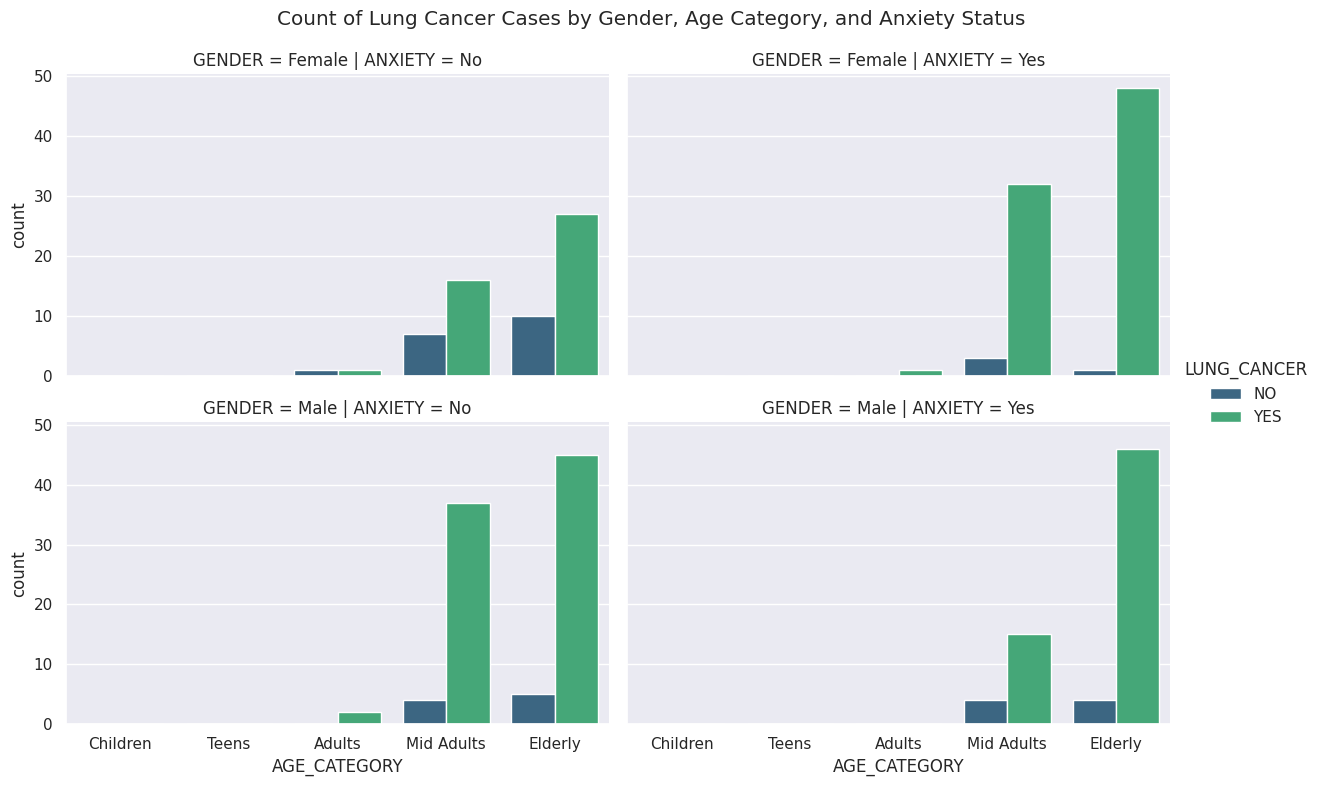

In [82]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='ANXIETY', row='GENDER', data=genders_with_age_category_with_anxiety_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Anxiety Status')
plt.show()

In [83]:
genders_with_age_category_with_peer_pressure_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'PEER_PRESSURE', 'LUNG_CANCER']).size().reset_index(name='count')

In [84]:
genders_with_age_category_with_peer_pressure_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
PEER_PRESSURE,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,1,0,1,8,11,2,37,10,21,1,54,0,0,0,0,0,0,0,0,0,0,0,2,6,36,2,16,4,56,5,35


<Figure size 1400x1000 with 0 Axes>

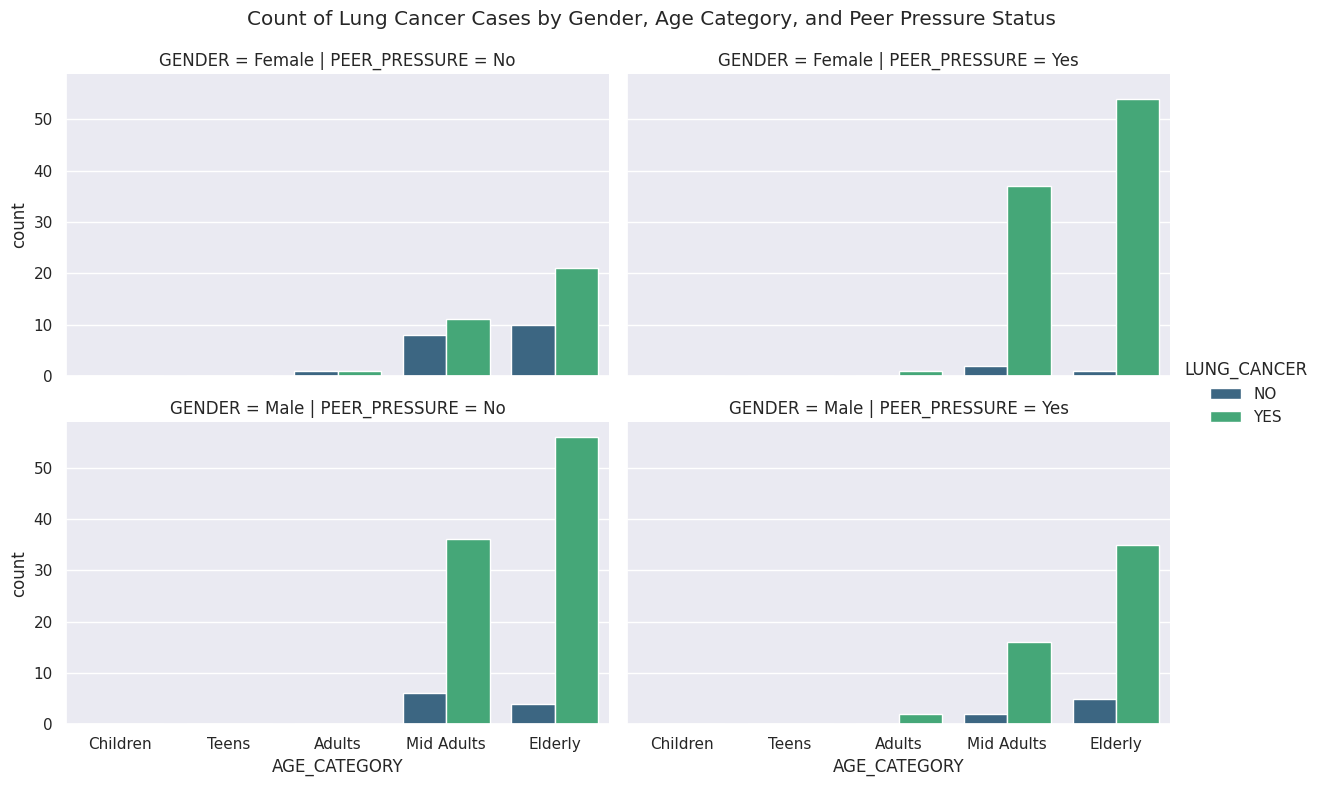

In [85]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='PEER_PRESSURE', row='GENDER', data=genders_with_age_category_with_peer_pressure_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Peer Pressure Status')
plt.show()

In [86]:
genders_with_age_category_with_chronic_disease_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'CHRONIC DISEASE', 'LUNG_CANCER']).size().reset_index(name='count')

In [87]:
genders_with_age_category_with_chronic_disease_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
CHRONIC DISEASE,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,0,0,1,2,8,15,2,33,4,30,7,45,0,0,0,0,0,0,0,0,0,1,0,1,6,28,2,24,7,54,2,37


<Figure size 1400x1000 with 0 Axes>

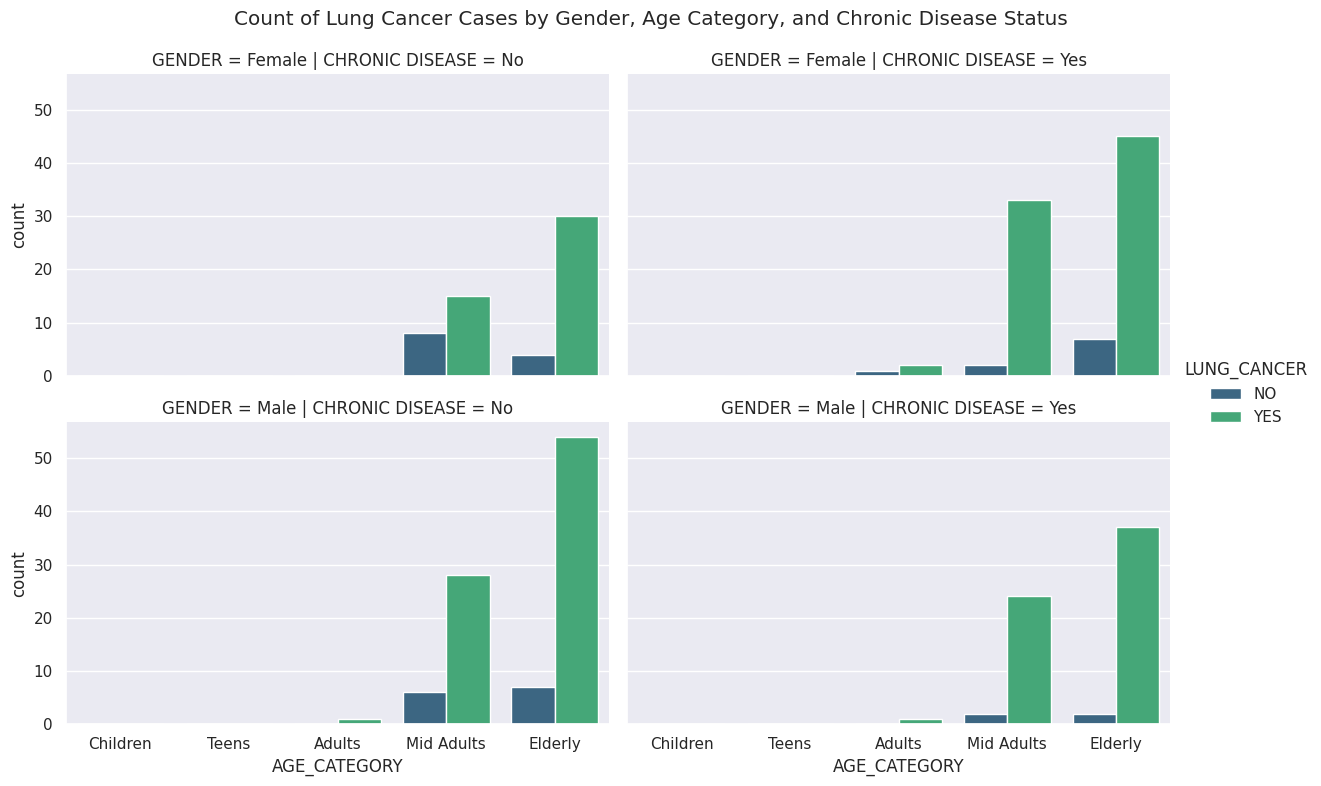

In [88]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='CHRONIC DISEASE', row='GENDER', data=genders_with_age_category_with_chronic_disease_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Chronic Disease Status')
plt.show()

In [89]:
genders_with_age_category_with_fatigue_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'FATIGUE ', 'LUNG_CANCER']).size().reset_index(name='count')

In [90]:
genders_with_age_category_with_fatigue_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
FATIGUE,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,0,0,1,2,5,12,5,36,3,22,8,53,0,0,0,0,0,0,0,0,0,0,0,2,5,20,3,32,7,27,2,64


<Figure size 1400x1000 with 0 Axes>

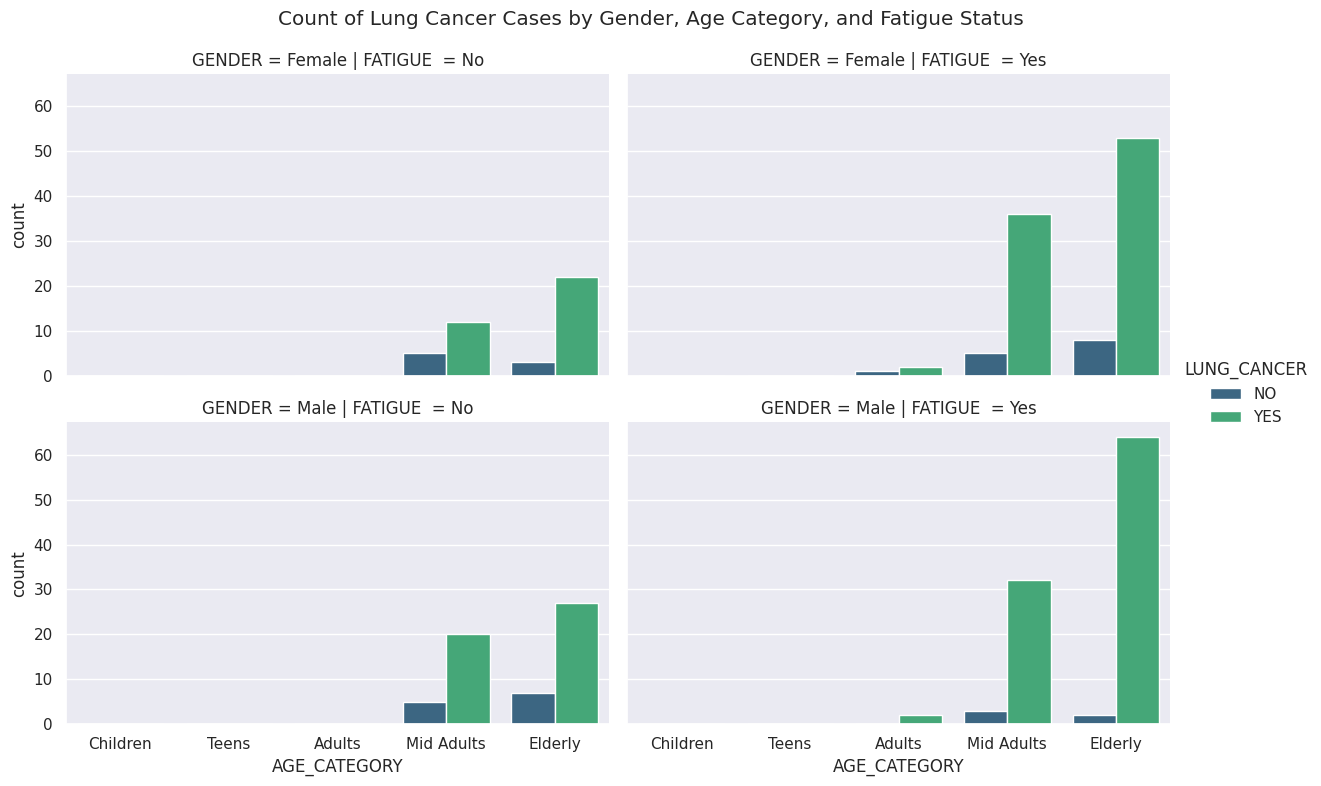

In [91]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='FATIGUE ', row='GENDER', data=genders_with_age_category_with_fatigue_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Fatigue Status')
plt.show()

In [92]:
genders_with_age_category_with_allergy_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'ALLERGY ', 'LUNG_CANCER']).size().reset_index(name='count')

In [93]:
genders_with_age_category_with_allergy_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
ALLERGY,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,0,1,1,1,9,22,1,26,11,34,0,41,0,0,0,0,0,0,0,0,0,1,0,1,7,18,1,34,7,27,2,64


<Figure size 1400x1000 with 0 Axes>

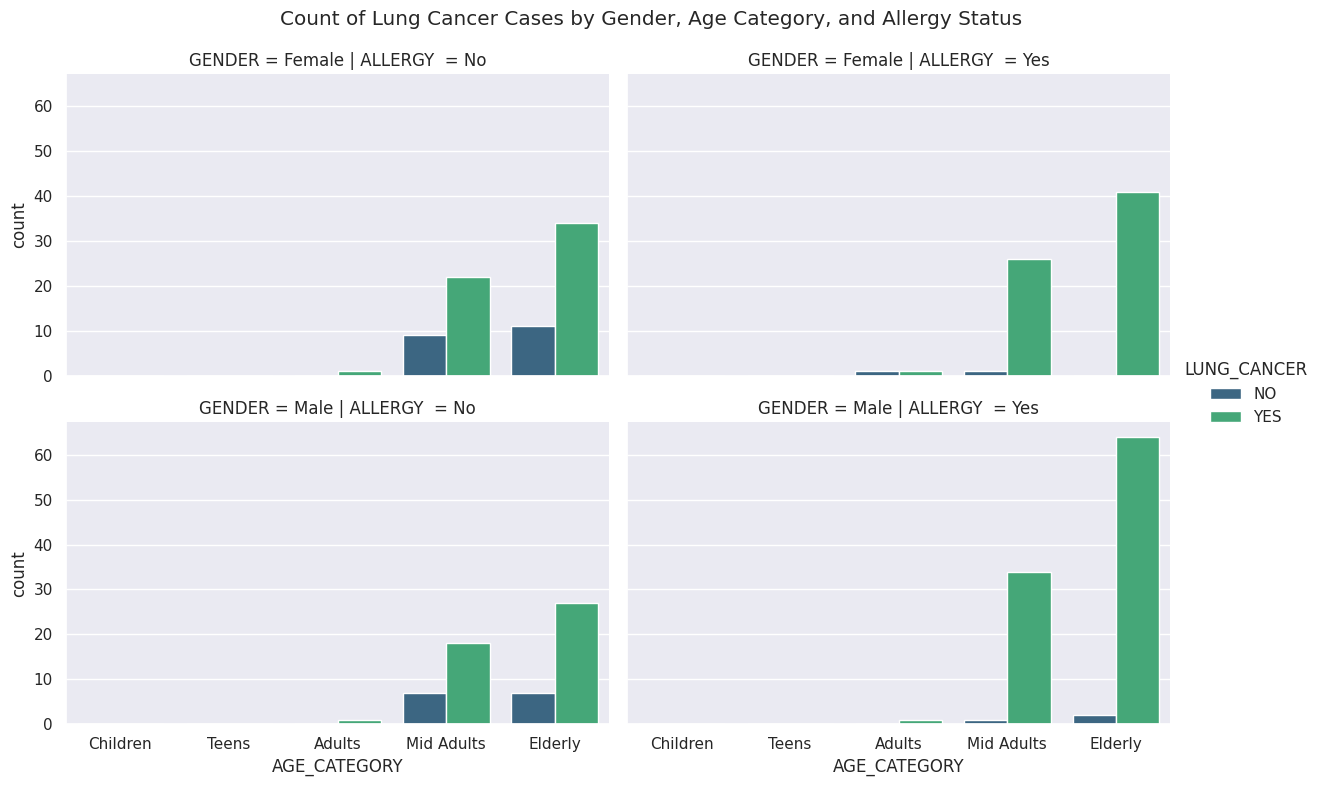

In [94]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='ALLERGY ', row='GENDER', data=genders_with_age_category_with_allergy_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Allergy Status')
plt.show()

In [95]:
genders_with_age_category_with_wheezing_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'WHEEZING', 'LUNG_CANCER']).size().reset_index(name='count')

In [96]:
genders_with_age_category_with_wheezing_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
WHEEZING,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,1,0,1,8,24,2,24,9,33,2,42,0,0,0,0,0,0,0,0,0,0,0,2,6,16,2,36,6,33,3,58


<Figure size 1400x1000 with 0 Axes>

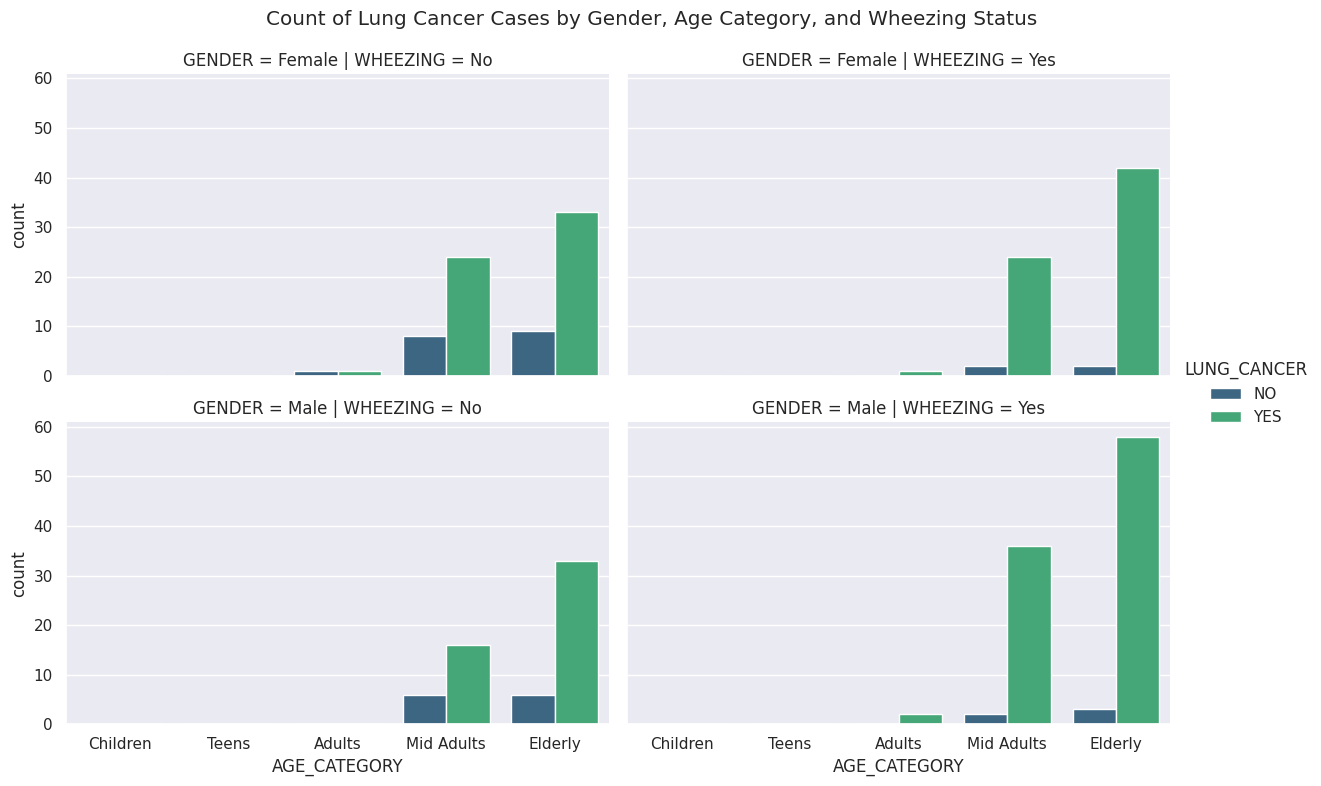

In [97]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='WHEEZING', row='GENDER', data=genders_with_age_category_with_wheezing_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Wheezing Status')
plt.show()

In [98]:
genders_with_age_category_with_alcohol_consuming_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'ALCOHOL CONSUMING', 'LUNG_CANCER']).size().reset_index(name='count')

In [99]:
genders_with_age_category_with_alcohol_consuming_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
ALCOHOL CONSUMING,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,2,0,0,10,29,0,19,11,47,0,28,0,0,0,0,0,0,0,0,0,1,0,1,6,7,2,45,4,19,5,72


<Figure size 1400x1000 with 0 Axes>

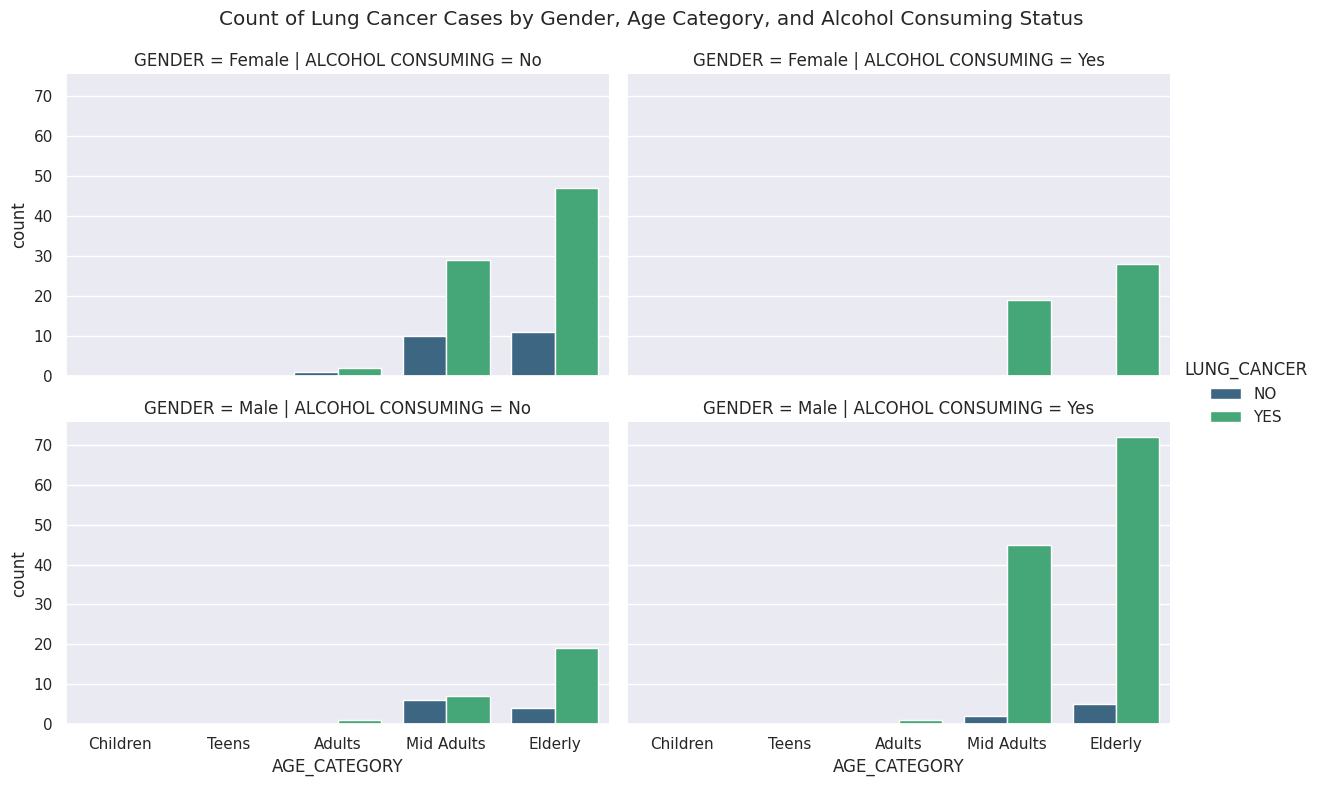

In [100]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='ALCOHOL CONSUMING', row='GENDER', data=genders_with_age_category_with_alcohol_consuming_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Alcohol Consuming Status')
plt.show()

In [101]:
genders_with_age_category_with_coughing_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'COUGHING', 'LUNG_CANCER']).size().reset_index(name='count')

In [102]:
genders_with_age_category_with_coughing_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
COUGHING,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,1,0,1,7,26,3,22,9,28,2,47,0,0,0,0,0,0,0,0,0,2,0,0,7,17,1,35,5,27,4,64


<Figure size 1400x1000 with 0 Axes>

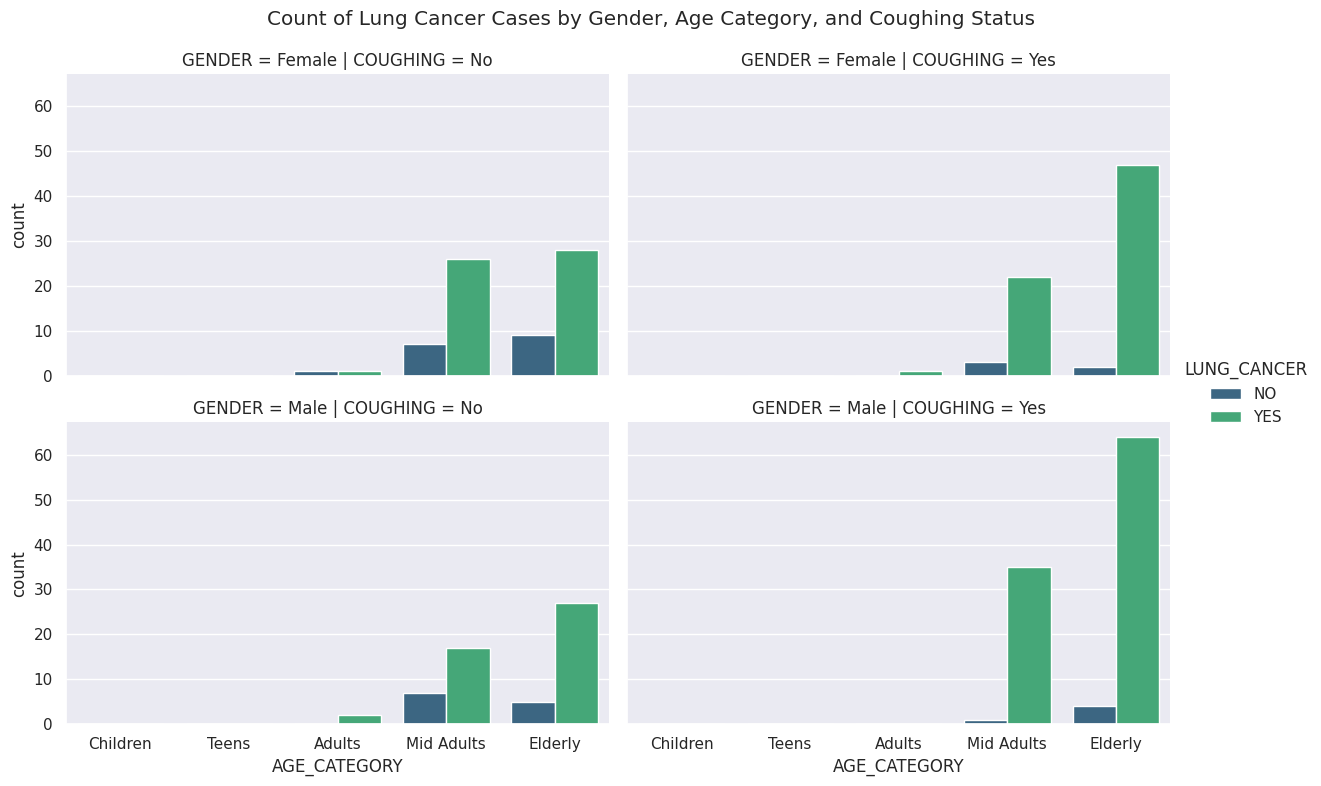

In [103]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='COUGHING', row='GENDER', data=genders_with_age_category_with_coughing_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Coughing Status')
plt.show()

In [104]:
genders_with_age_category_with_shortness_of_breath_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'SHORTNESS OF BREATH', 'LUNG_CANCER']).size().reset_index(name='count')

In [105]:
genders_with_age_category_with_shortness_of_breath_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
SHORTNESS OF BREATH,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,0,0,1,2,4,16,6,32,2,26,9,49,0,0,0,0,0,0,0,0,0,0,0,2,4,21,4,31,7,31,2,60


<Figure size 1400x1000 with 0 Axes>

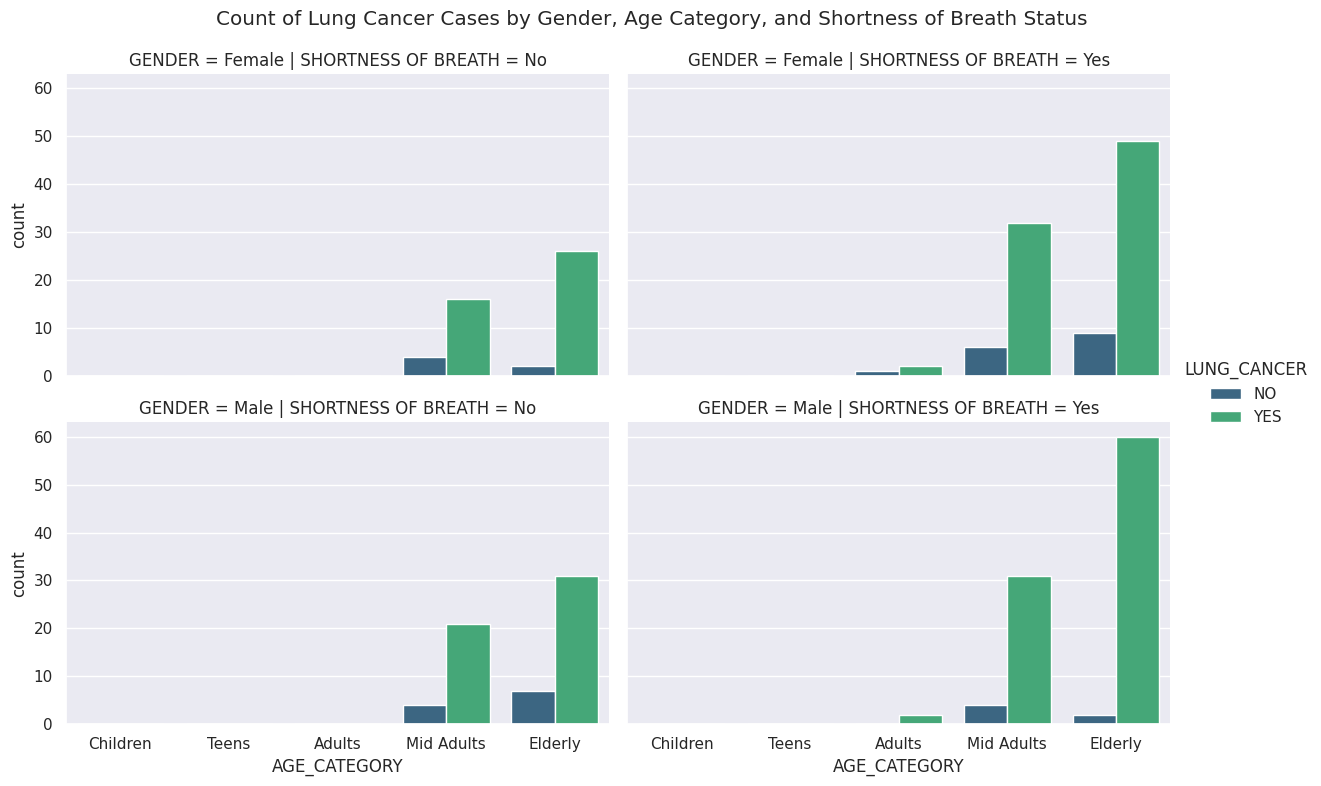

In [106]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='SHORTNESS OF BREATH', row='GENDER', data=genders_with_age_category_with_shortness_of_breath_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Shortness of Breath Status')
plt.show()

In [107]:
genders_with_age_category_with_swallowing_difficulty_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'SWALLOWING DIFFICULTY', 'LUNG_CANCER']).size().reset_index(name='count')

In [108]:
genders_with_age_category_with_swallowing_difficulty_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
SWALLOWING DIFFICULTY,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,1,0,1,9,18,1,30,11,32,0,43,0,0,0,0,0,0,0,0,0,1,0,1,5,31,3,21,8,47,1,44


<Figure size 1400x1000 with 0 Axes>

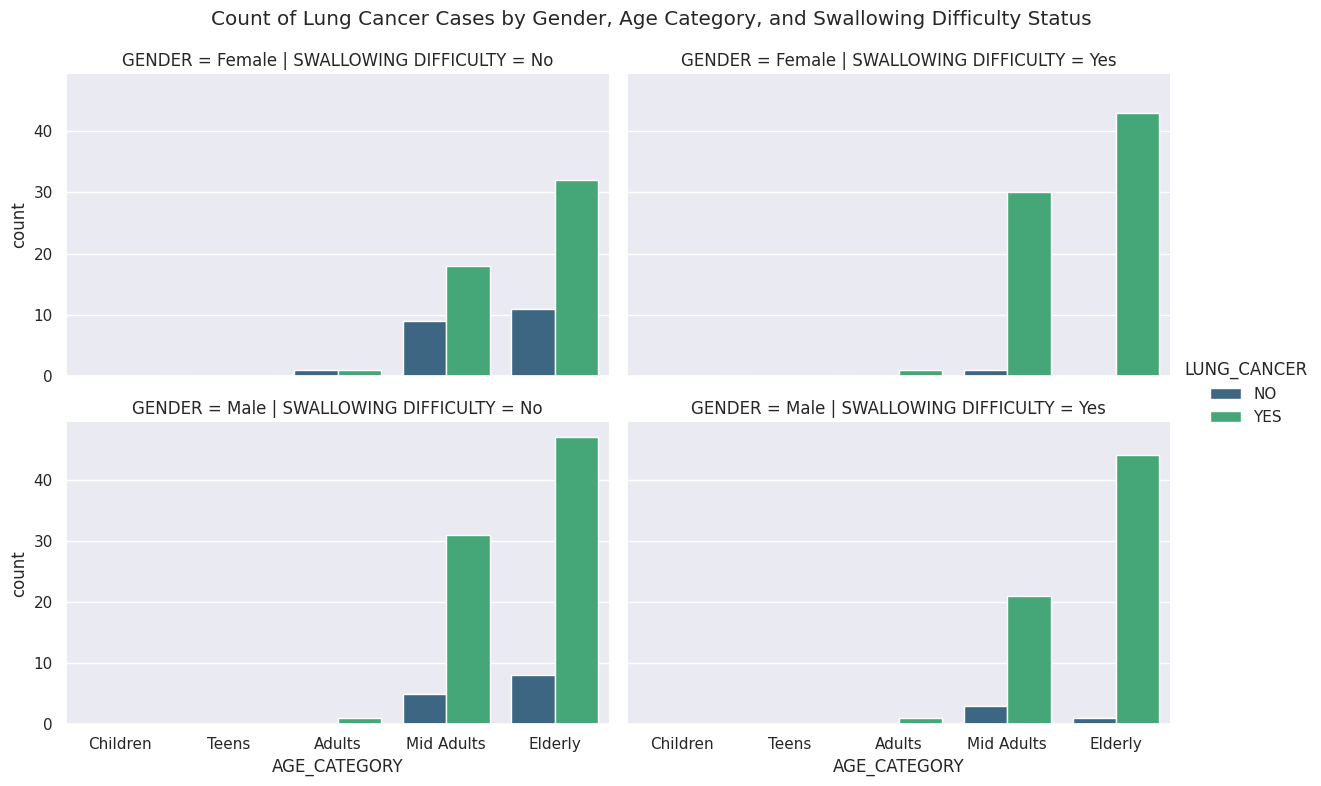

In [109]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='SWALLOWING DIFFICULTY', row='GENDER', data=genders_with_age_category_with_swallowing_difficulty_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Swallowing Difficulty Status')
plt.show()

In [110]:
genders_with_age_category_with_chest_pain_have_lung_cancer = df.groupby(['GENDER', 'AGE_CATEGORY', 'CHEST PAIN', 'LUNG_CANCER']).size().reset_index(name='count')

In [111]:
genders_with_age_category_with_chest_pain_have_lung_cancer.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
GENDER,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
AGE_CATEGORY,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly,Children,Children,Children,Children,Teens,Teens,Teens,Teens,Adults,Adults,Adults,Adults,Mid Adults,Mid Adults,Mid Adults,Mid Adults,Elderly,Elderly,Elderly,Elderly
CHEST PAIN,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes
LUNG_CANCER,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES
count,0,0,0,0,0,0,0,0,1,1,0,1,8,28,2,20,11,44,0,31,0,0,0,0,0,0,0,0,0,0,0,2,3,10,5,42,4,27,5,64


<Figure size 1400x1000 with 0 Axes>

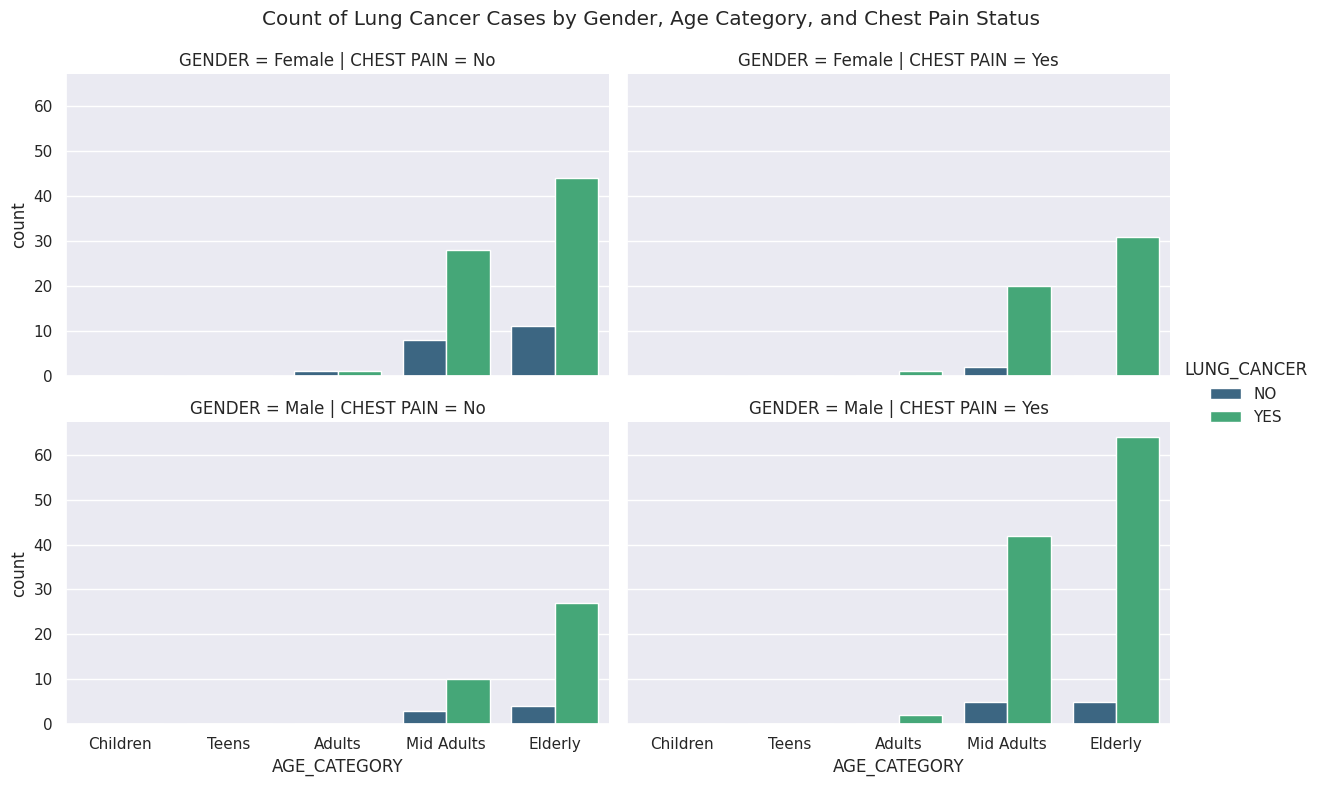

In [112]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
g = sns.catplot(x='AGE_CATEGORY', y='count', hue='LUNG_CANCER', col='CHEST PAIN', row='GENDER', data=genders_with_age_category_with_chest_pain_have_lung_cancer, kind='bar', palette='viridis', height=4, aspect=1.5)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Lung Cancer Cases by Gender, Age Category, and Chest Pain Status')
plt.show()

# Thankyou